## Desafio - Regressão Linear Múltipla

In [49]:
# data analysis and wrangling
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# metrics
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from scipy.stats import zscore
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

# statistical analysis 
import pingouin as pg

# save model
import joblib

### Carregar Dados

In [50]:
file_path = '../../datasets/challenges/dataset_aluguel.csv'
df_rent = pd.read_csv(file_path)
df_rent.head()

,id,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,1,106.181018,1,36.760806,0,True,False,1767.122088
1,2,192.607146,4,10.453581,1,True,False,3278.742397
2,3,159.799091,5,27.072399,1,True,False,2953.899737
3,4,139.798773,4,34.789220,1,False,True,2514.717108
4,5,73.402796,5,11.427501,0,False,True,1942.164396


In [51]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    int64  
 5   localizacao_Periferia  100 non-null    bool   
 6   localizacao_Subúrbio   100 non-null    bool   
 7   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


### Análise do dados e tratamento de variáveis

In [52]:
# Analisar valores únicos das colunas
print(df_rent.select_dtypes(include=['bool', 'int', 'float']).nunique())

id                       100
tamanho_m2               100
n_quartos                  5
idade_casa               100
garagem                    2
localizacao_Periferia      2
localizacao_Subúrbio       2
valor_aluguel            100
dtype: int64


In [53]:
# valores ausentes
df_rent.isna().sum()

id                       0
tamanho_m2               0
n_quartos                0
idade_casa               0
garagem                  0
localizacao_Periferia    0
localizacao_Subúrbio     0
valor_aluguel            0
dtype: int64

In [54]:
# remover coluna id
df_rent.drop('id', axis=1, inplace=True)
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tamanho_m2             100 non-null    float64
 1   n_quartos              100 non-null    int64  
 2   idade_casa             100 non-null    float64
 3   garagem                100 non-null    int64  
 4   localizacao_Periferia  100 non-null    bool   
 5   localizacao_Subúrbio   100 non-null    bool   
 6   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


In [55]:
# estatística descritiva
df_rent.describe()

,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


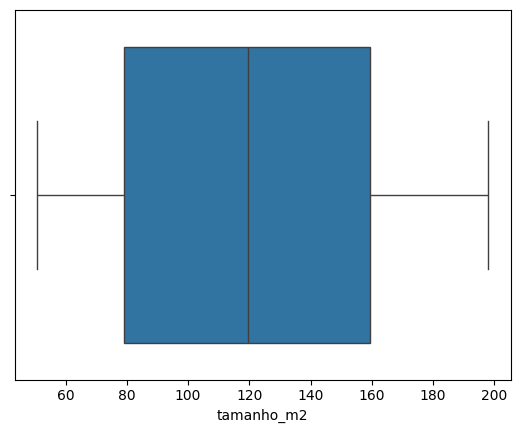

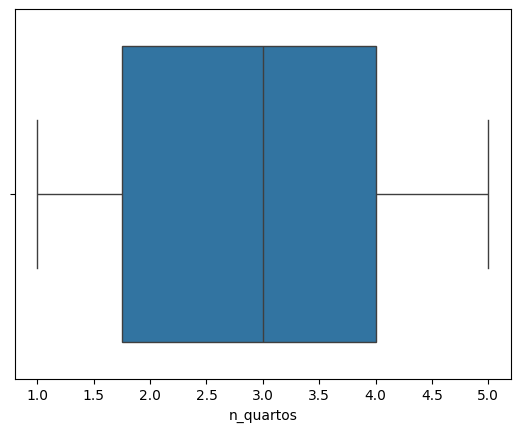

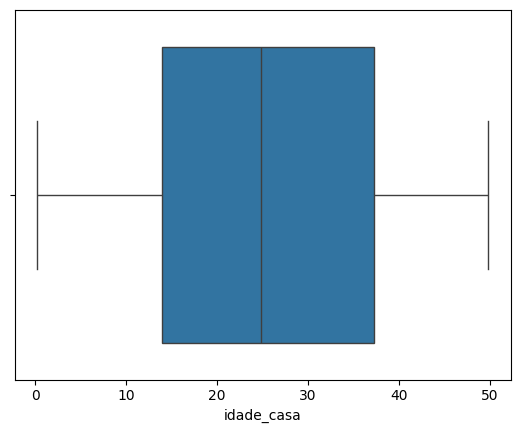

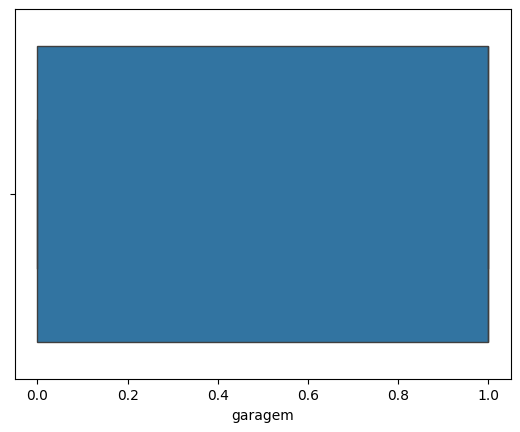

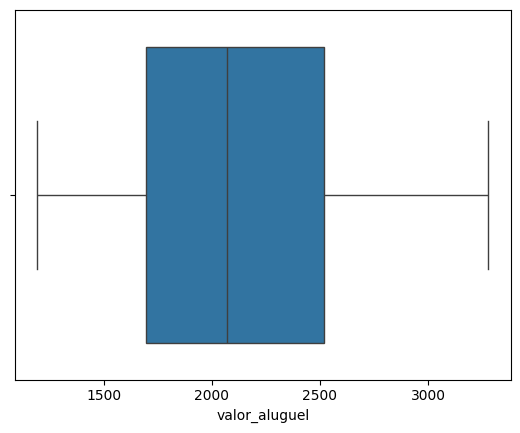

In [56]:
# Tratar outliers
sns.boxplot(data=df_rent, x='tamanho_m2')
plt.show()
sns.boxplot(data=df_rent, x='n_quartos')
plt.show()
sns.boxplot(data=df_rent, x='idade_casa')
plt.show()
sns.boxplot(data=df_rent, x='garagem')
plt.show()
sns.boxplot(data=df_rent, x='valor_aluguel')
plt.show()

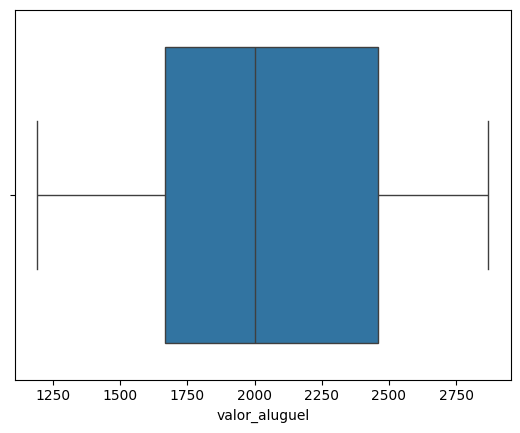

In [57]:
# emover outliers baseados na variável 'valor_aluguel' (exemplo)
df_rent = df_rent[df_rent['valor_aluguel'] < df_rent['valor_aluguel'].quantile(0.95)]
sns.boxplot(data=df_rent, x='valor_aluguel')
plt.show()

In [58]:
# codificar variáveis categóricas
df_rent = pd.get_dummies(df_rent, columns=[
                            'localizacao_Periferia', 'localizacao_Subúrbio'], dtype='int64')
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tamanho_m2                   95 non-null     float64
 1   n_quartos                    95 non-null     int64  
 2   idade_casa                   95 non-null     float64
 3   garagem                      95 non-null     int64  
 4   valor_aluguel                95 non-null     float64
 5   localizacao_Periferia_False  95 non-null     int64  
 6   localizacao_Periferia_True   95 non-null     int64  
 7   localizacao_Subúrbio_False   95 non-null     int64  
 8   localizacao_Subúrbio_True    95 non-null     int64  
dtypes: float64(3), int64(6)
memory usage: 7.4 KB


### Preparação e Treinamento do Modelo

In [59]:
# Separar em conjuntos de treino e teste
X = df_rent.drop(columns='valor_aluguel', axis=1)
y = df_rent['valor_aluguel']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=51)


# Definir colunas numéricas
colunas_numericas = ['tamanho_m2', 'n_quartos', 'idade_casa', 'garagem']

# Criar pipeline de pré-processamento e modelo
transformer_numericas = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas)
    ]
)

model_regr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression()),
    ]
)

# Treinar o modelo
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tamanho_m2', 'n_quartos',
                                                   'idade_casa',
                                                   'garagem'])])),
                ('regressor', LinearRegression())])

### Análises e Testes do Modelo

In [60]:
# Previsões e avaliação do modelo
from sklearn.metrics import root_mean_squared_error


y_pred = model_regr.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R²: 0.9322029683692089
MAE: 93.70235270972051
RMSE: 114.47558148024322


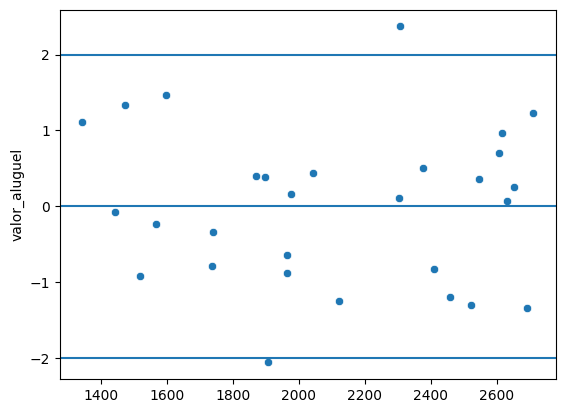

In [61]:
# Análise dos resíduos
residuos = y_test - y_pred
residuos_std = zscore(residuos)
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)
plt.show()

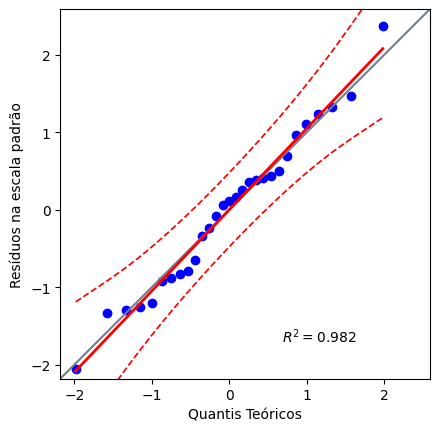

In [62]:
# Testes de normalidade e heterocedasticidade nos resíduos
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [64]:
# continuação dos testes
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(
    f"Estatística do Teste Shapiro-Wilk: {stat_shapiro} e P-Value: {p_value_shapiro}")

stat_KS, p_value_KS = kstest(residuos, 'norm')
print(f"Estatística do Teste KS: {stat_KS} e P-Value: {p_value_KS}")

stat_ll, p_value_ll = lilliefors(residuos, 'norm', pvalmethod='table')
print(f"Estatística do Teste Lilliefors: {stat_ll} e P-Value: {p_value_ll}")

stat_and, critical_and, significance_and = anderson(residuos, 'norm')
print(
    f"Estatística do Teste Anderson-Darling: {stat_and} e Valor Crítico: {critical_and[2]}")

X_test_transformed = preprocessor.transform(X_test)
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print(
    f"Estatística do Teste Goldfeld-Quandt: {stat_goldfeld} e P-Value: {p_value_goldfeld}")

Estatística do Teste Shapiro-Wilk: 0.9832211151050111 e P-Value: 0.9113572494759457
Estatística do Teste KS: 0.5517241379310324 e P-Value: 8.003447647095402e-09
Estatística do Teste Lilliefors: 0.08986554820919257 e P-Value: 0.7867761996042536
Estatística do Teste Anderson-Darling: 0.2310963389927032 e Valor Crítico: 0.71
Estatística do Teste Goldfeld-Quandt: 1.8271955940254385 e P-Value: 0.16852042487324123
